In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 418M/428M [00:07<00:00, 55.9MB/s]
100% 428M/428M [00:07<00:00, 59.9MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

# **IMPORT MODULES**

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
from IPython.display import Audio
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,ps
1,/content/tess toronto emotional speech set dat...,ps
2,/content/tess toronto emotional speech set dat...,ps
3,/content/tess toronto emotional speech set dat...,ps
4,/content/tess toronto emotional speech set dat...,ps


In [ ]:
df['label'].value_counts()

,count
label,
ps,400
fear,400
happy,400
sad,400
disgust,400
neutral,400
angry,400


<Axes: xlabel='count', ylabel='label'>

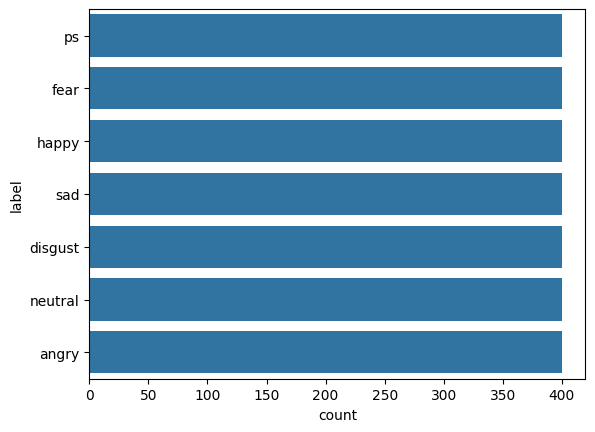

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [ ]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

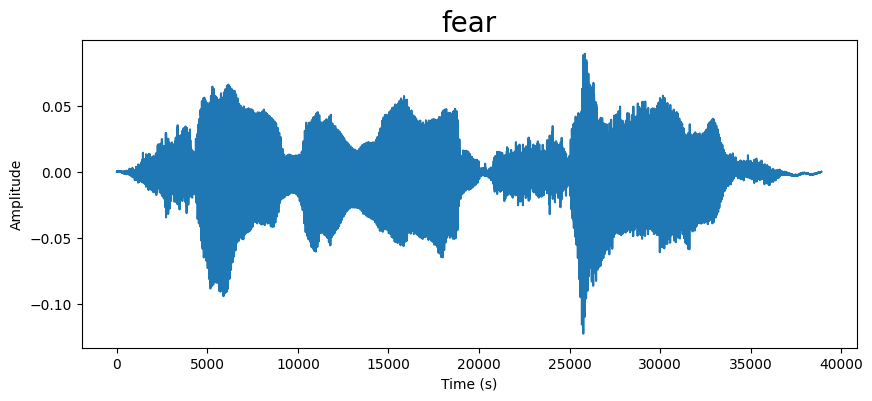

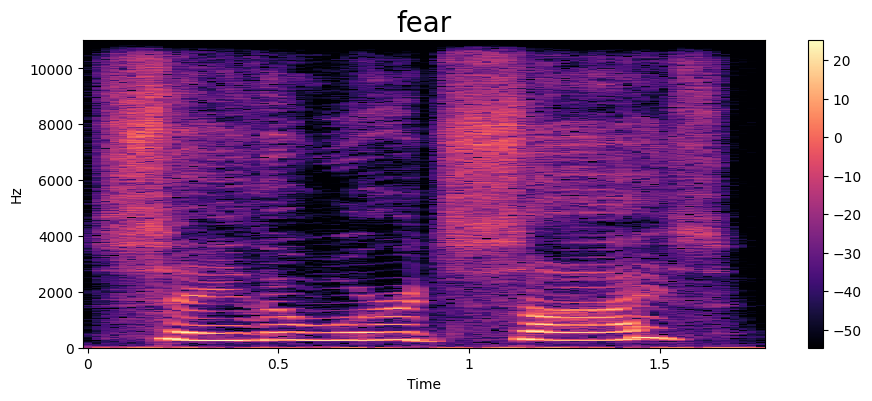

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

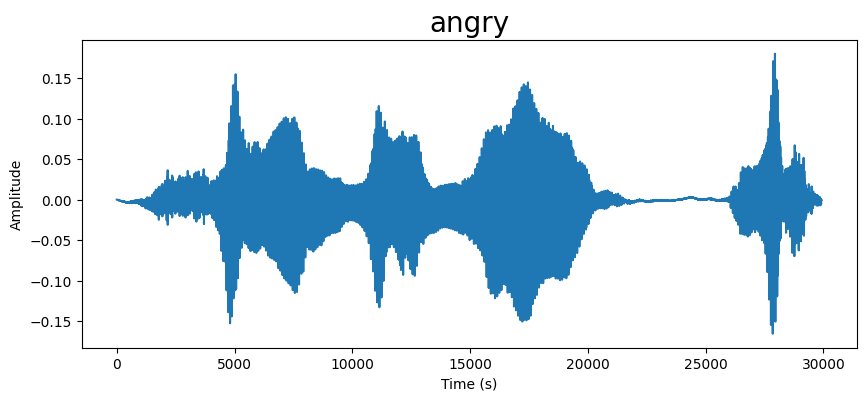

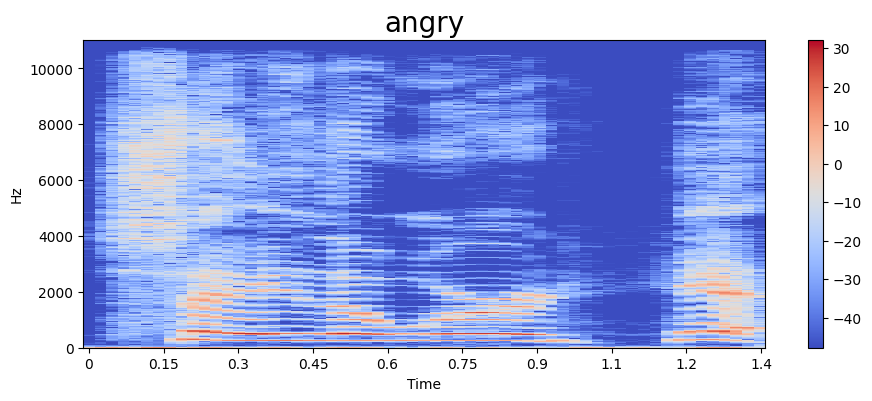

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

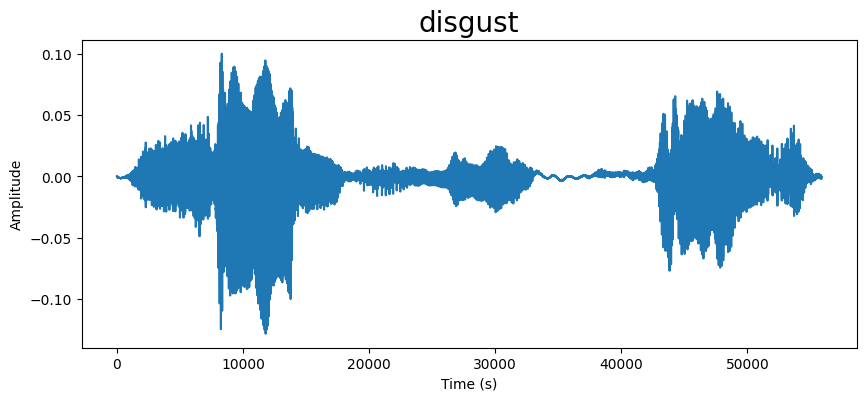

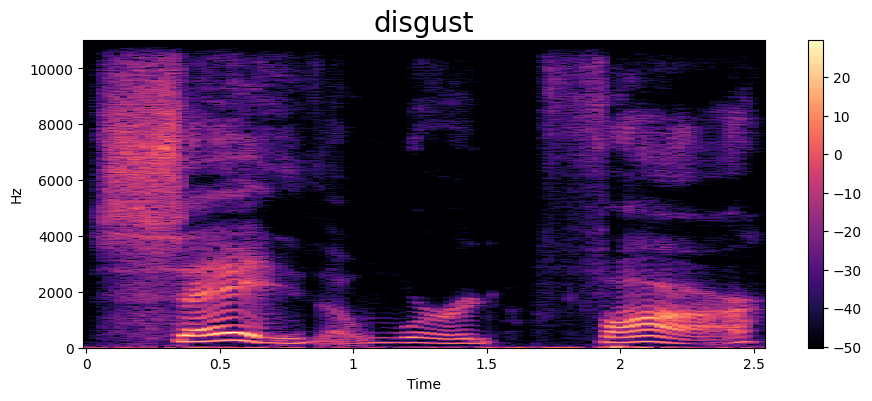

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

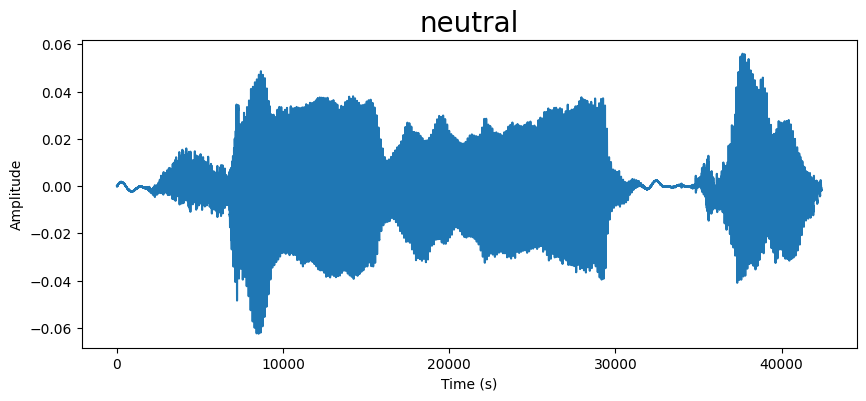

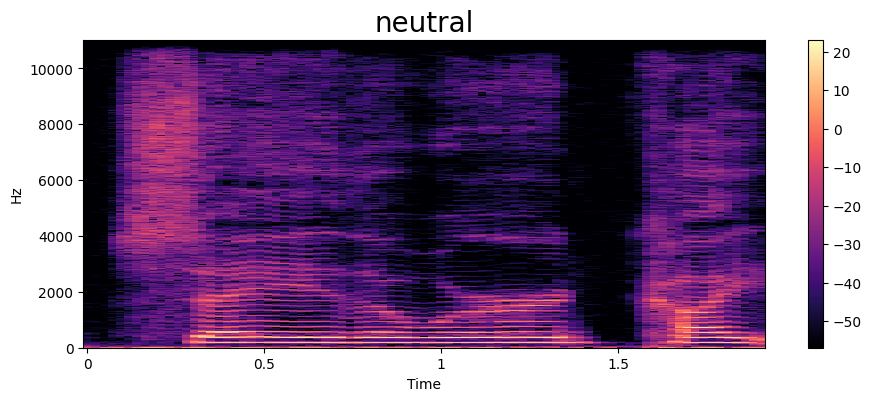

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

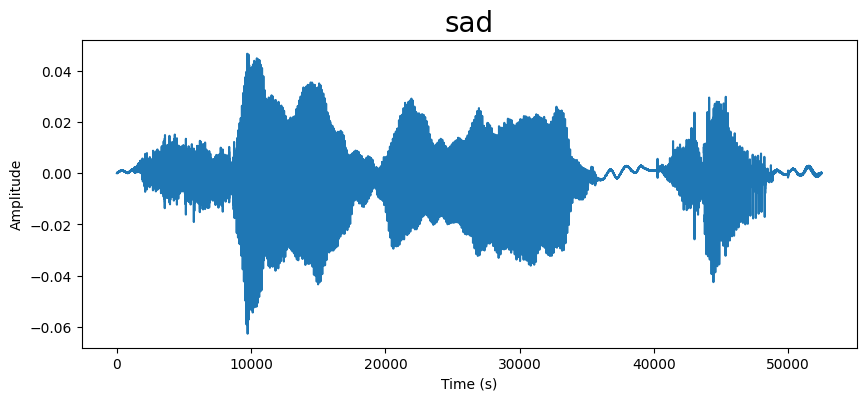

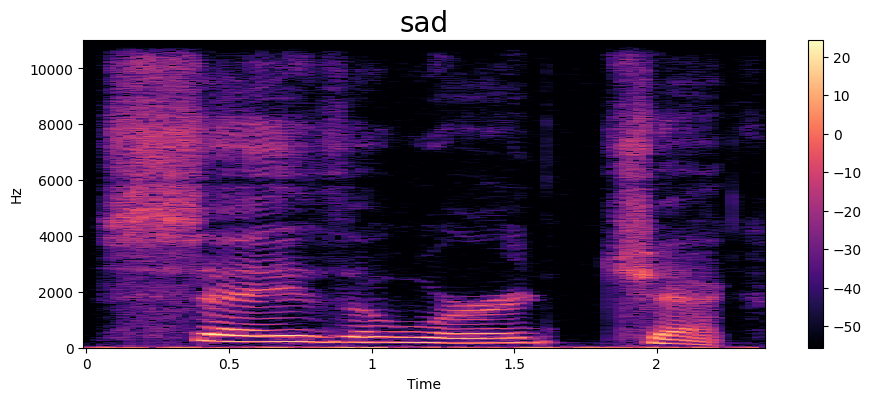

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

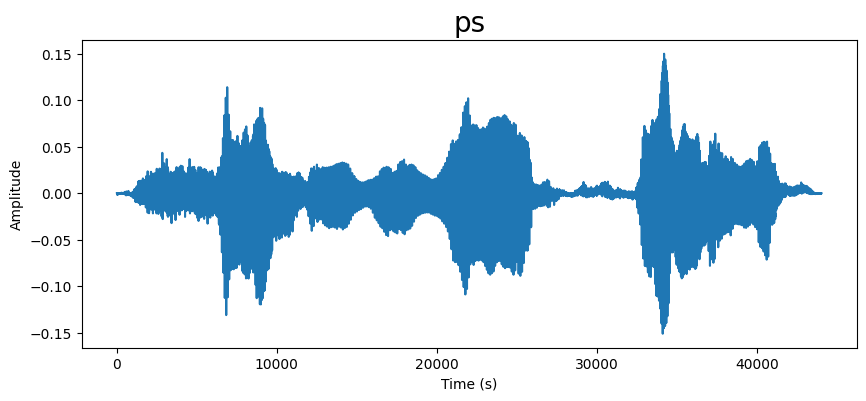

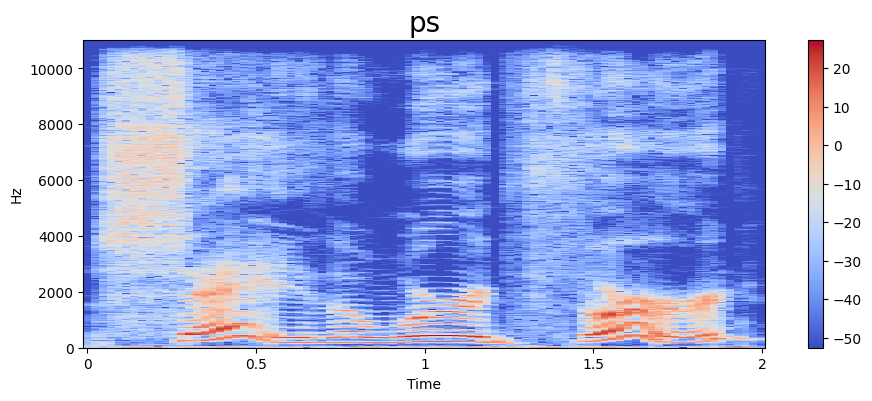

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

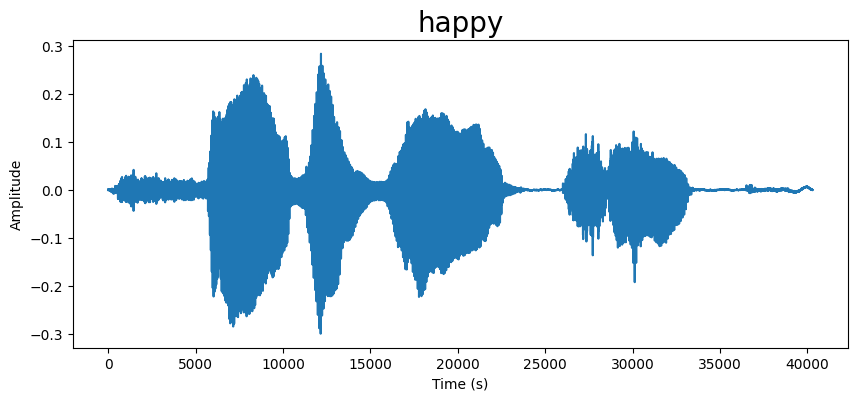

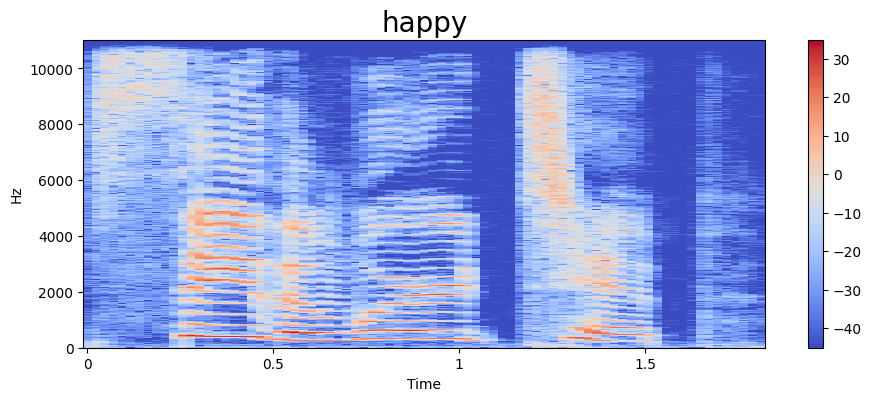

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

,speech
0,"[-441.8355, 111.25132, 13.164758, -34.82251, 1..."
1,"[-496.56116, 117.238655, 21.471125, 1.8774668,..."
2,"[-429.57617, 96.84065, 10.537672, -11.502708, ..."
3,"[-476.07047, 120.36238, -23.18892, -4.1534038,..."
4,"[-417.7034, 110.75616, 2.8642013, -18.923342, ..."
...,...
2795,"[-335.12985, 30.14752, 0.06873559, 13.134081, ..."
2796,"[-389.04993, 90.45158, 5.151683, 44.672207, 0...."
2797,"[-322.15805, 43.490833, -5.3218946, 9.012743, ..."
2798,"[-324.36246, 55.675537, -4.9687376, 1.275695, ..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

# **INPUT SPLIT**

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

y.shape


(2800, 7)

# **CREATING LSTM MODELS**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.3389 - loss: 1.6807 - val_accuracy: 0.7522 - val_loss: 0.7024
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.7343 - loss: 0.6887 - val_accuracy: 0.9196 - val_loss: 0.2550
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.8660 - loss: 0.3687 - val_accuracy: 0.9219 - val_loss: 0.2148
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9101 - loss: 0.2752 - val_accuracy: 0.9330 - val_loss: 0.2140
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.9277 - loss: 0.2074 - val_accuracy: 0.9196 - val_loss: 0.2541
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.9198 - loss: 0.2692 - val_accuracy: 0.9688 - val_loss: 0.1335
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.9618 - loss: 0.1283 - val_accuracy: 0.9554 - val_loss: 0.1376
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.9678 - loss: 0.0966 - val_accuracy: 0.

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.9863 - loss: 0.0389 - val_accuracy: 0.7125 - val_loss: 1.3450
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - accuracy: 0.9944 - loss: 0.0167 - val_accuracy: 0.7554 - val_loss: 1.1789
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.9820 - loss: 0.0523 - val_accuracy: 0.8839 - val_loss: 0.3771
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.9902 - loss: 0.0261 - val_accuracy: 0.7554 - val_loss: 0.9232
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.7786 - val_loss: 0.7969
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9924 - loss: 0.0281 - val_accuracy: 0.7321 - val_loss: 0.9259
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.9934 - loss: 0.0178 - val_accuracy: 0.7982 - val_loss: 0.7695
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.9976 - loss: 0.0067 - val_accuracy: 

# **PLOT THE RESULTS**

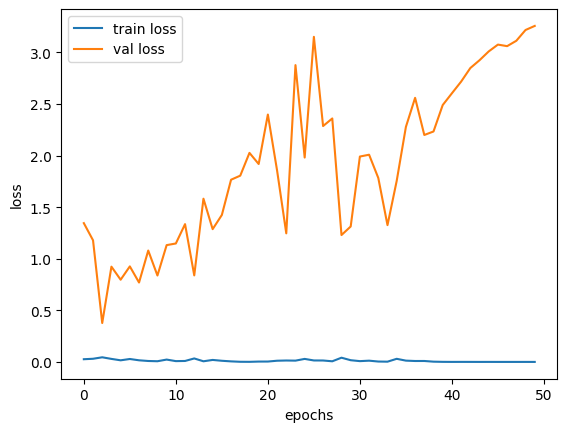

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()